# Test analysis e KNN

The basic element of an NLP pipeline:
- Word tokenization;
- Identifying stop words;
- Stemming;
- Lemmatization;
- POS tagging;
- NER tagging;
- Sentence segmentation.
- The Bag Of Words (BOW) representation;
- Text classificaiton.

### 1. Text processing Base

In [1]:
import spacy

nlp = spacy.load('en_core_web_sm')

words = [t.text for t in nlp.vocab]

doc = nlp("Let's go to N.Y.!") # aggiorna anche le parole in nlp
print(doc)

words2 = [t.text for t in nlp.vocab]
print(set(words2) - set(words)) # stampa le parole che sono state aggiunte durante il processing

Let's go to N.Y.!
{'go', '!', 'to'}


### 1.1 Tokenization

In [2]:
for i,token in enumerate(doc):
    print(f'Token {i+1} -> {token}')

Token 1 -> Let
Token 2 -> 's
Token 3 -> go
Token 4 -> to
Token 5 -> N.Y.
Token 6 -> !


### 1.2 Stemming

In [3]:
import nltk
from nltk.stem.porter import *

p_stemmer = PorterStemmer()
words = ['go', 'goes', 'went', 'wish', 'wishes', 'wished', 'runner', 'ran', 'running']

for w in words:
    print(f"{w} -> {p_stemmer.stem(w)}")

go -> go
goes -> goe
went -> went
wish -> wish
wishes -> wish
wished -> wish
runner -> runner
ran -> ran
running -> run


### 1.3 Lemmatization

In [4]:
doc = nlp("I will meet you in the meeting after meeting the runner when running.")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

I -> I
will -> will
meet -> meet
you -> you
in -> in
the -> the
meeting -> meeting
after -> after
meeting -> meet
the -> the
runner -> runner
when -> when
running -> run
. -> .


### 1.4 Stop Words

In [5]:
print(list(nlp.Defaults.stop_words)[:10], end="\n\n") 

for t in doc:
    print(f"{t.text} -> {t.is_stop}")
print("\n")

['she', 'through', 'make', 'a', 'call', 'among', 'n’t', 'full', 'under', 'we']

I -> True
will -> True
meet -> False
you -> True
in -> True
the -> True
meeting -> False
after -> True
meeting -> False
the -> True
runner -> False
when -> True
running -> False
. -> False




In [6]:
nlp.Defaults.stop_words.remove('go')  # rimuoviamo 'go' dalle stop words
nlp.vocab['go'].is_stop = False
outcome = nlp.vocab['go'].is_stop
print(f"Is 'go' a stop word now? {outcome}")

Is 'go' a stop word now? False


In [7]:
nlp.Defaults.stop_words.add('!') # aggiungo '!' alle stop words
nlp.vocab['!'].is_stop = True
outcome = nlp.vocab['!'].is_stop
print(f"Is '!' a stop word now? {outcome}")

Is '!' a stop word now? True


### 1.5 Part of Speech (POS) Tagging

In [8]:
for t in nlp("\"Let's go to N.Y.!\""): 
    print(f"{t.text} -> {t.pos_}")

" -> PUNCT
Let -> VERB
's -> PRON
go -> VERB
to -> ADP
N.Y. -> PROPN
! -> PUNCT
" -> PUNCT


In [9]:
for t in nlp("\"Let's go to N.Y.!\""): # ottengo più dettagli
    print(f"{t.text} -> {spacy.explain(t.tag_)}")

" -> opening quotation mark
Let -> verb, base form
's -> pronoun, personal
go -> verb, base form
to -> conjunction, subordinating or preposition
N.Y. -> noun, proper singular
! -> punctuation mark, sentence closer
" -> closing quotation mark


### 1.6 Named Entity Recognition (NER)

In [10]:
doc = nlp('Boris Johnson is to offer EU leaders a historic grand bargain on Brexit — help deliver his new deal this week or agree a “no-deal” departure by October 31.')

for e in doc.ents:
    print(f"{e.text} - {e.label} - {e.label_} - {spacy.explain(e.label_)}")
    
print('- ' * 70)

from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

Boris Johnson - 380 - PERSON - People, including fictional
EU - 383 - ORG - Companies, agencies, institutions, etc.
Brexit - 380 - PERSON - People, including fictional
this week - 391 - DATE - Absolute or relative dates or periods
October 31 - 391 - DATE - Absolute or relative dates or periods
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


### 1.7 Sentence Segmentation

In [11]:
doc = nlp("I gave you $3.5. Do you remember? Since I owed you $1.5, you should now give me 2 dollars.")
list(doc.sents)

for t in doc:
    print(f"{t} -> {t.is_sent_start}")

I -> True
gave -> False
you -> False
$ -> False
3.5 -> False
. -> False
Do -> True
you -> False
remember -> False
? -> False
Since -> True
I -> False
owed -> False
you -> False
$ -> False
1.5 -> False
, -> False
you -> False
should -> False
now -> False
give -> False
me -> False
2 -> False
dollars -> False
. -> False


### 2. Bag of Words Representation

In [12]:
import pandas as pd

#due to the way the CSV file has been saved,
#we need to specify the latin-1 encoding

spam = pd.read_csv('spam.csv', encoding='latin-1')
spam = spam[['v1','v2']]
spam = spam.rename(columns ={'v1':'class', 'v2':'text'})
spam.head(10)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
print(spam.iloc[0]['class'], '---', spam.iloc[0]['text'])
print()
print(spam.iloc[15]['class'], '---', spam.iloc[15]['text'])
print()
print(spam.iloc[25]['class'], '---', spam.iloc[25]['text'])

ham --- Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

spam --- XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL

ham --- Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol


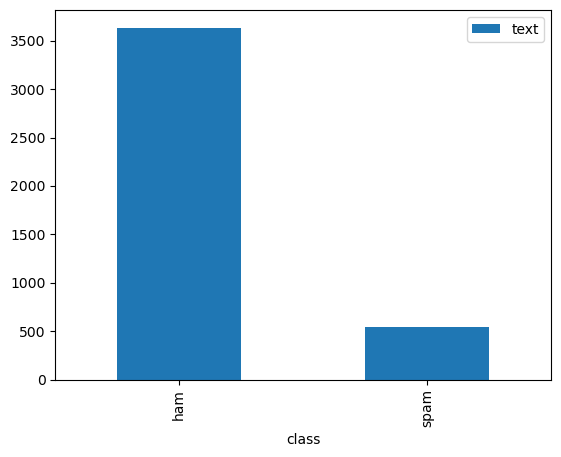

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

#we will set a seed to make sure
#that the split is always performed in the same way
#this is for instructional purposes only
#and it is not generally done when
#analyzing data to make sure that the 
#split is truly random

np.random.seed(1234)

#let's use 25% of the dataset as test set
train_set, test_set = train_test_split(spam, test_size=0.25)

from matplotlib import pyplot as plt
train_set.groupby('class').count().plot.bar()
plt.show()

### 2.1 Tokenizating and counting words with CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(['this is', 'a list of', 'short messages']) 
# addestra count_vect -> conterrà  informazioni sul vocabolario del corpus fornito

CountVectorizer()

- Il metodo **'count_vect.vocabulary_'** restituisce il vocabolario appreso dal CountVectorizer durante la fase di addestramento. Questo vocabolario è rappresentato come un dizionario, in cui le chiavi sono le parole uniche nel corpus di testo fornito durante l'addestramento e i valori sono gli indici associati a ciascuna parola nel vettore di conteggio risultante.

In [16]:
count_vect.vocabulary_

{'this': 5, 'is': 0, 'list': 1, 'of': 3, 'short': 4, 'messages': 2}

- Il metodo **'transform'** di CountVectorizer prende una lista di nuovi testi e li trasforma in vettori di conteggio in base al vocabolario appreso durante l'addestramento. In questo caso, la lista di nuovi testi è ['this is', 'a list of', 'short messages'].
  
- La chiamata **'todense()'** viene utilizzata per convertire la matrice sparsa ottenuta dalla trasformazione del CountVectorizer in una matrice densa.

- La funzione **'fit_transform'** restituisce una matrice sparsa dove ogni riga corrisponde a un documento (o testo) e ogni colonna rappresenta una parola nel vocabolario appreso durante l'addestramento. Gli elementi della matrice indicano il conteggio delle occorrenze di ciascuna parola nei rispettivi documenti.

In [17]:
new_doc = ['this is', 'a list of', 'short messages']
features = count_vect.transform(new_doc) # term frequency
features = features.todense()
features

matrix([[1, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0]])

In [18]:
print ('this is',features[0], end='\n\n')

this is [[1 0 0 0 0 1]]



In [19]:
features=count_vect.transform(['this is a new message'])
features.todense()

matrix([[1, 0, 0, 0, 0, 1]])

In [20]:
x_train = count_vect.fit_transform(train_set['text'])
print(x_train)
# Nella seconda riga (1, 3341) 2 indica che la parola 
# con indice 3341 appare due volte nel secondo documento.

  (0, 4691)	1
  (0, 857)	1
  (0, 7010)	1
  (0, 7038)	1
  (0, 5016)	1
  (0, 5841)	1
  (1, 3228)	1
  (1, 3341)	2
  (1, 7345)	2
  (1, 888)	1
  (1, 2200)	1
  (1, 5651)	1
  (1, 3002)	1
  (1, 7029)	1
  (1, 3687)	1
  (1, 6484)	1
  (1, 6616)	3
  (1, 5709)	1
  (1, 3420)	1
  (1, 2108)	1
  (1, 2269)	1
  (1, 927)	2
  (1, 6636)	1
  (1, 4603)	1
  (1, 6498)	1
  :	:
  (4176, 4691)	1
  (4177, 6545)	1
  (4177, 3191)	1
  (4177, 2534)	1
  (4177, 4709)	1
  (4177, 7302)	1
  (4177, 1915)	1
  (4177, 6509)	1
  (4177, 3626)	1
  (4178, 7345)	1
  (4178, 3687)	1
  (4178, 3420)	1
  (4178, 4603)	1
  (4178, 3563)	1
  (4178, 3769)	1
  (4178, 7109)	1
  (4178, 6009)	1
  (4178, 3025)	1
  (4178, 5169)	1
  (4178, 6629)	1
  (4178, 5658)	1
  (4178, 1369)	1
  (4178, 3192)	1
  (4178, 2597)	1
  (4178, 4590)	1


# 3. Nearest Neighbor

In [21]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(k) # modello predittivo

- Il metodo 'fit' viene utilizzato per mettere a punto i parametri del classificatore. In questo caso, viene utilizzato per fornire (e memorizzare) l'insieme di addestramento. È necessario fornire sia le caratteristiche di input che le etichette corrispondenti:

- La funzione 'prediction' viene utilizzata per classificare un campione;

In [22]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

In [23]:
message = test_set.iloc[260]['text']
true_label = test_set.iloc[260]['class']
print(f'class: {true_label} -- message: {message}')

class: spam -- message: FREE MSG:We billed your mobile number by mistake from shortcode 83332.Please call 08081263000 to have charges refunded.This call will be free from a BT landline


In [24]:
feats = count_vect.transform([message])
predict_label = knn.predict(feats)

print(f'Predicted label: {predict_label[0]} -- True label: {true_label}')

# Confronto tra la predizione e l'etichetta vera
cond = str(predict_label[0]) == str(true_label)
print('KNN classifier got the prediction right' if cond else 'KNN classifier got the prediction wrong')

Predicted label: ham -- True label: spam
KNN classifier got the prediction wrong


In [25]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)
y_test_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_set['class'],y_test_pred)
print(f'Accurancy: {acc}\n')
print(f'Il {np.round(acc*100, 2)}% delle predizioni sono corrette')

Accurancy: 0.9461593682699211

Il 94.62% delle predizioni sono corrette


In [27]:
from sklearn.metrics import confusion_matrix
#labels=['ham','spam'] is needed to make sure that the first class is ham and the second one is spam
cm = confusion_matrix(test_set['class'],y_test_pred, labels=['ham','spam'])
print(f'Matrice di confusione:\n {cm}', end='\n\n')

tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]

print(f'Veri positivi: {tp}')
print(f'Veri negativi: {tn}')
print(f'Falsi positivi: {fp}')
print(f'Flasi negativi: {fn}')
print("-"*70)

# Oppure
tp, fn, fp, tn = cm.ravel() #Traccia una Z
print(f'Veri positivi: {tp}')
print(f'Veri negativi: {tn}')
print(f'Falsi positivi: {fp}')
print(f'Flasi negativi: {fn}')

Matrice di confusione:
 [[1188    1]
 [  74  130]]

Veri positivi: 1188
Veri negativi: 130
Falsi positivi: 74
Flasi negativi: 1
----------------------------------------------------------------------
Veri positivi: 1188
Veri negativi: 130
Falsi positivi: 74
Flasi negativi: 1


In [28]:
# Estrai i valori dalla matrice di confusione
true_negatives, false_positives, false_negatives, true_positives = cm.ravel()

# Calcola le percentuali
total_instances = len(test_set)
accuracy = (true_positives + true_negatives) / total_instances
precision_ham = true_negatives / (true_negatives + false_positives)
precision_spam = true_positives / (true_positives + false_negatives)
recall_ham = true_negatives / (true_negatives + false_negatives)
recall_spam = true_positives / (true_positives + false_positives)

# Stampa le percentuali
print(f'Total Instances: {total_instances}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision for "ham": {precision_ham:.2%}')
print(f'Precision for "spam": {precision_spam:.2%}')
print(f'Recall for "ham": {recall_ham:.2%}')
print(f'Recall for "spam": {recall_spam:.2%}')

Total Instances: 1393
Accuracy: 94.62%
Precision for "ham": 99.92%
Precision for "spam": 63.73%
Recall for "ham": 94.14%
Recall for "spam": 99.24%


In [29]:
def f1_score_stats(f1_scores):
    f1_scores = np.round(f1_scores, 3)
    print(f"F1-score per 'ham': {f1_scores[0]}")
    print(f"F1-score per 'spam': {f1_scores[1]}")
    print(f'F1-score medio: {f1_scores.mean():.3f}')

In [30]:
from sklearn.metrics import f1_score
#average=None is needed to obtain per-class scores
#labels=['ham','spam'] is needed to make sure that the first score is for ham and the second is for spam
f1_scores = f1_score(test_set['class'],y_test_pred, average=None, labels=['ham','spam'])

# Capacità di minimizzare i falsi positivi e negativi del nostro modello
f1_score_stats(f1_scores)

F1-score per 'ham': 0.969
F1-score per 'spam': 0.776
F1-score medio: 0.873


In [31]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,train_set['class'])
y_test_pred_5 = knn_5.predict(x_test)
f1_scores_5=f1_score(test_set['class'],y_test_pred_5, average=None, labels=['ham','spam'])

f1_score_stats(f1_scores_5)

F1-score per 'ham': 0.947
F1-score per 'spam': 0.522
F1-score medio: 0.734


# 4. Advances tools

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer()

x_train_counts = count_vect.fit_transform(train_set['text']) # TF
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts) # TF-IDF

# non riaddestra il modello (test set)
x_test_counts = count_vect.transform(test_set['text']) 
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train_tf_idf, train_set['class']) # addestra il classificatore

y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores = f1_score(test_set['class'],y_test_preds, average=None, labels=['ham','spam'])

f1_score_stats(f1_scores)

F1-score per 'ham': 0.971
F1-score per 'spam': 0.786
F1-score medio: 0.879


In [35]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts = count_vect.fit_transform(train_set['text'])
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(test_set['text'])
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train_tf_idf, train_set['class'])

y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores = f1_score(test_set['class'],y_test_preds, average=None, labels=['ham','spam'])

f1_score_stats(f1_scores)

F1-score per 'ham': 0.975
F1-score per 'spam': 0.823
F1-score medio: 0.899
